In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding,LSTM,Dense,Dropout,GRU,BatchNormalization,Bidirectional
from sklearn.preprocessing import LabelEncoder,MinMaxScaler,OneHotEncoder
from sklearn.model_selection import train_test_split

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
dataset=pd.read_csv(r'/content/drive/MyDrive/vxp/expanded_career_advancement_dataset.csv')
df=dataset.copy()

In [ ]:
df['combined_text'] = df[['current_role','current_industry','previous_roles','key_skills','certifications','desired_role','preferred_industry','short_term_goal','long_term_goal','learning_style']].apply(lambda x:' '.join(x.dropna()),axis=1)

In [ ]:
df.head()

,user_id,age,gender,current_role,years_of_experience,current_industry,previous_roles,key_skills,certifications,desired_role,preferred_industry,short_term_goal,long_term_goal,learning_style,time_available_per_week,motivation_level,recommended_skills,combined_text
0,1,52,Female,Content Writer,13.4,Marketing,"Software Engineer, Content Writer, Marketing S...","Project Management, Data Analysis, SEO, Python",NaN,Data Scientist,Marketing,Upskilling,Expertise,Collaborative,10,6,Leadership,"Content Writer Marketing Software Engineer, Co..."
1,2,47,Female,Software Engineer,4.6,Healthcare,"Content Writer, HR Manager, Software Engineer","Leadership, Cloud Computing, Java, Data Analys...","AWS Certified, Scrum Master, Google Analytics",Team Lead,Marketing,Role Switch,Leadership,Collaborative,28,2,"Python, SEO","Software Engineer Healthcare Content Writer, H..."
2,3,49,Male,Entrepreneur,1.6,Marketing,HR Manager,"Leadership, Data Analysis, Cloud Computing, Pr...","Scrum Master, Google Analytics, PMP",Business Consultant,Healthcare,Upskilling,Entrepreneurship,Collaborative,10,3,"Data Analysis, Leadership","Entrepreneur Marketing HR Manager Leadership, ..."
3,4,37,Female,Entrepreneur,15.1,Finance,HR Manager,"Cloud Computing, SEO",NaN,Creative Director,Education,Role Switch,Leadership,Hands-on,11,9,"SEO, Data Analysis",Entrepreneur Finance HR Manager Cloud Computin...
4,5,47,Female,Software Engineer,6.3,Finance,Entrepreneur,"Leadership, Project Management",NaN,Business Consultant,Healthcare,Role Switch,Expertise,Hands-on,29,5,"Python, Data Analysis",Software Engineer Finance Entrepreneur Leaders...


In [ ]:
df.dropna(axis=1,inplace=True)
df.head(1)

,user_id,age,gender,current_role,years_of_experience,current_industry,previous_roles,key_skills,desired_role,preferred_industry,short_term_goal,long_term_goal,learning_style,time_available_per_week,motivation_level,recommended_skills,combined_text
0,1,52,Female,Content Writer,13.4,Marketing,"Software Engineer, Content Writer, Marketing S...","Project Management, Data Analysis, SEO, Python",Data Scientist,Marketing,Upskilling,Expertise,Collaborative,10,6,Leadership,"Content Writer Marketing Software Engineer, Co..."


In [ ]:
le=LabelEncoder()
df['gender']=le.fit_transform(df['gender'])
df.head(1)

,user_id,age,gender,current_role,years_of_experience,current_industry,previous_roles,key_skills,desired_role,preferred_industry,short_term_goal,long_term_goal,learning_style,time_available_per_week,motivation_level,recommended_skills,combined_text
0,1,52,0,Content Writer,13.4,Marketing,"Software Engineer, Content Writer, Marketing S...","Project Management, Data Analysis, SEO, Python",Data Scientist,Marketing,Upskilling,Expertise,Collaborative,10,6,Leadership,"Content Writer Marketing Software Engineer, Co..."


In [ ]:
oe=OneHotEncoder()
df['learning_style']=oe.fit_transform(df[['learning_style']]).toarray()
df.head(5)

,user_id,age,gender,current_role,years_of_experience,current_industry,previous_roles,key_skills,desired_role,preferred_industry,short_term_goal,long_term_goal,learning_style,time_available_per_week,motivation_level,recommended_skills,combined_text
0,1,52,0,Content Writer,13.4,Marketing,"Software Engineer, Content Writer, Marketing S...","Project Management, Data Analysis, SEO, Python",Data Scientist,Marketing,Upskilling,Expertise,1.0,10,6,Leadership,"Content Writer Marketing Software Engineer, Co..."
1,2,47,0,Software Engineer,4.6,Healthcare,"Content Writer, HR Manager, Software Engineer","Leadership, Cloud Computing, Java, Data Analys...",Team Lead,Marketing,Role Switch,Leadership,1.0,28,2,"Python, SEO","Software Engineer Healthcare Content Writer, H..."
2,3,49,1,Entrepreneur,1.6,Marketing,HR Manager,"Leadership, Data Analysis, Cloud Computing, Pr...",Business Consultant,Healthcare,Upskilling,Entrepreneurship,1.0,10,3,"Data Analysis, Leadership","Entrepreneur Marketing HR Manager Leadership, ..."
3,4,37,0,Entrepreneur,15.1,Finance,HR Manager,"Cloud Computing, SEO",Creative Director,Education,Role Switch,Leadership,0.0,11,9,"SEO, Data Analysis",Entrepreneur Finance HR Manager Cloud Computin...
4,5,47,0,Software Engineer,6.3,Finance,Entrepreneur,"Leadership, Project Management",Business Consultant,Healthcare,Role Switch,Expertise,0.0,29,5,"Python, Data Analysis",Software Engineer Finance Entrepreneur Leaders...


In [ ]:
df['combined_text'] = oe.fit_transform(df[['combined_text']]).toarray()
df.head(2)

,user_id,age,gender,current_role,years_of_experience,current_industry,previous_roles,key_skills,desired_role,preferred_industry,short_term_goal,long_term_goal,learning_style,time_available_per_week,motivation_level,recommended_skills,combined_text
0,1,52,0,Content Writer,13.4,Marketing,"Software Engineer, Content Writer, Marketing S...","Project Management, Data Analysis, SEO, Python",Data Scientist,Marketing,Upskilling,Expertise,1.0,10,6,Leadership,0.0
1,2,47,0,Software Engineer,4.6,Healthcare,"Content Writer, HR Manager, Software Engineer","Leadership, Cloud Computing, Java, Data Analys...",Team Lead,Marketing,Role Switch,Leadership,1.0,28,2,"Python, SEO",0.0


In [ ]:
df.drop(['current_role','current_industry','previous_roles','key_skills','desired_role','preferred_industry','short_term_goal','long_term_goal'],axis=1,inplace=True)
df.head(2)

,user_id,age,gender,years_of_experience,learning_style,time_available_per_week,motivation_level,recommended_skills,combined_text
0,1,52,0,13.4,1.0,10,6,Leadership,0.0
1,2,47,0,4.6,1.0,28,2,"Python, SEO",0.0


In [ ]:
sc=MinMaxScaler()
for col in df.columns:
     if col in ['gender','learning_style','combined_text','age','time_available_per_week','motivation_level','years_of_experience']:
        df[col]=sc.fit_transform(df[[col]])
df.head(2)
df

,user_id,age,gender,years_of_experience,learning_style,time_available_per_week,motivation_level,recommended_skills,combined_text
0,1,0.813953,0.0,0.615054,1.0,0.241379,0.555556,Leadership,0.0
1,2,0.697674,0.0,0.211138,1.0,0.862069,0.111111,"Python, SEO",0.0
2,3,0.744186,1.0,0.073439,1.0,0.241379,0.222222,"Data Analysis, Leadership",0.0
3,4,0.465116,0.0,0.693083,0.0,0.275862,0.888889,"SEO, Data Analysis",0.0
4,5,0.697674,0.0,0.289167,0.0,0.896552,0.444444,"Python, Data Analysis",0.0
...,...,...,...,...,...,...,...,...,...
2995,2251,0.302326,1.0,0.461865,0.0,0.517241,0.555556,SEO,0.0
2996,3850,0.232558,1.0,0.305793,1.0,0.482759,0.111111,Leadership,0.0
2997,3260,0.558140,0.0,0.384080,1.0,0.517241,0.777778,"SEO, Python",0.0
2998,2031,0.279070,1.0,0.926140,0.0,0.448276,1.000000,"Data Analysis, Project Management",0.0


In [ ]:
df.drop(['user_id'],axis=1,inplace=True)
df.head(2)

,age,gender,years_of_experience,learning_style,time_available_per_week,motivation_level,recommended_skills,combined_text
0,0.813953,0.0,0.615054,1.0,0.241379,0.555556,Leadership,0.0
1,0.697674,0.0,0.211138,1.0,0.862069,0.111111,"Python, SEO",0.0


In [ ]:
df['recommended_skills'] = oe.fit_transform(df[['recommended_skills']]).toarray()
df['recommended_skills'] = sc.fit_transform(df[['recommended_skills']])
df.head(2)

,age,gender,years_of_experience,learning_style,time_available_per_week,motivation_level,recommended_skills,combined_text
0,0.813953,0.0,0.615054,1.0,0.241379,0.555556,0.0,0.0
1,0.697674,0.0,0.211138,1.0,0.862069,0.111111,0.0,0.0


In [ ]:
X = df.drop('recommended_skills', axis=1)
y = df['recommended_skills']

In [ ]:
X = np.array(X)

X = X.reshape((X.shape[0], 1, X.shape[1]))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = Sequential([
    Bidirectional(GRU(128, return_sequences=True, dropout=0.3, recurrent_dropout=0.3), input_shape=(1, X.shape[2])),
    Bidirectional(GRU(64, return_sequences=False, dropout=0.3, recurrent_dropout=0.3)),
    BatchNormalization(),
    Dense(64, activation='relu'),
    Dropout(0.4),
    Dense(len(np.unique(y)), activation='softmax')
])
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ bidirectional_6 (Bidirectional)      │ (None, 1, 256)              │         105,216 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_7 (Bidirectional)      │ (None, 128)                 │         123,648 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 2)                   │             130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 237,762 (928.76 KB)

 Trainable params: 237,506 (927.76 KB)

 Non-trainable params: 256 (1.00 KB)

In [ ]:
optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

Epoch 1/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - accuracy: 0.9620 - loss: 0.1690 - val_accuracy: 0.9633 - val_loss: 0.1684
Epoch 2/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.9635 - loss: 0.1683 - val_accuracy: 0.9633 - val_loss: 0.1696
Epoch 3/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9671 - loss: 0.1469 - val_accuracy: 0.9633 - val_loss: 0.1694
Epoch 4/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9665 - loss: 0.1581 - val_accuracy: 0.9633 - val_loss: 0.1685
Epoch 5/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.9660 - loss: 0.1541 - val_accuracy: 0.9633 - val_loss: 0.1688
Epoch 6/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.9578 - loss: 0.1880 - val_accuracy: 0.9633 - val_loss: 0.1687
Epoch 7/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.9600 - loss: 0.1772 - val_accuracy: 0.9633 - val_loss: 0.1677
Epoch 8/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.9666 - loss: 0.1486 - val_accuracy: 0.9633 - v

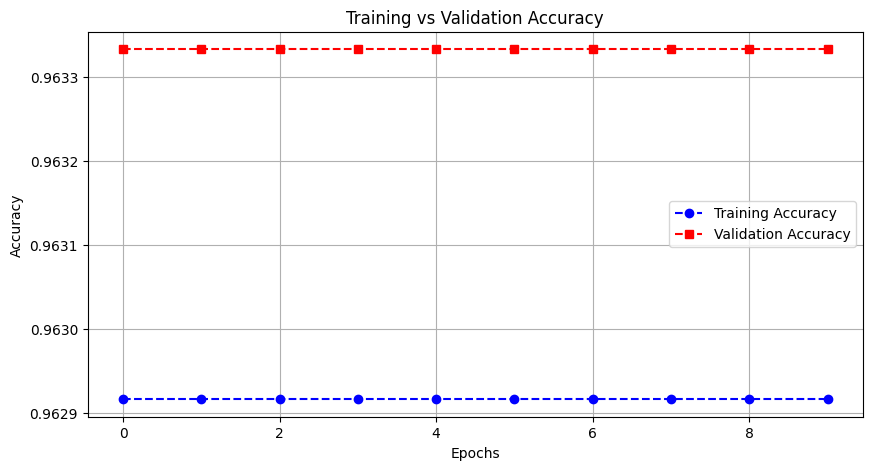

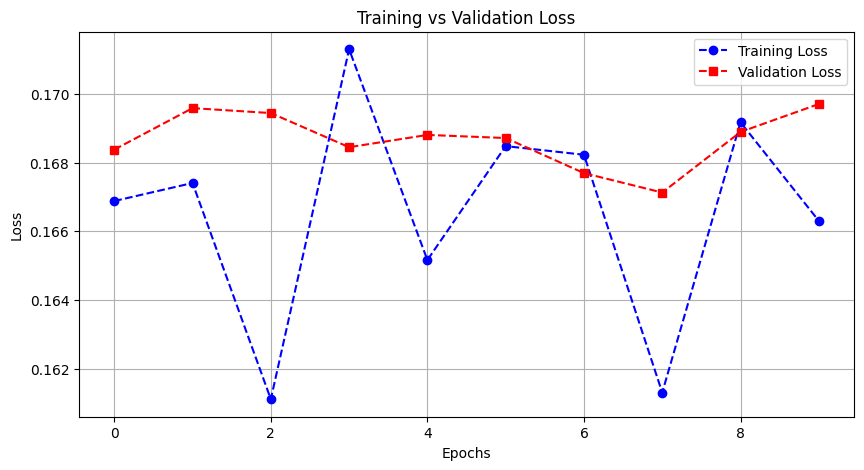

In [ ]:

history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=32)

import matplotlib.pyplot as plt


plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue', linestyle='dashed', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='red', linestyle='dashed', marker='s')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()
plt.grid()
plt.show()


plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss', color='blue', linestyle='dashed', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', color='red', linestyle='dashed', marker='s')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss')
plt.legend()
plt.grid()
plt.show()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ bidirectional_12 (Bidirectional)     │ (None, 1, 256)              │         105,216 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_13 (Bidirectional)     │ (None, 128)                 │         123,648 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 2)                   │             130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 258,434 (1009.51 KB)

 Trainable params: 258,178 (1008.51 KB)

 Non-trainable params: 256 (1.00 KB)

Epoch 1/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 59s 65ms/step - accuracy: 0.5714 - loss: 0.7269 - val_accuracy: 0.9633 - val_loss: 0.6199
Epoch 2/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - accuracy: 0.9100 - loss: 0.3250 - val_accuracy: 0.9633 - val_loss: 0.5537
Epoch 3/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.9540 - loss: 0.2346 - val_accuracy: 0.9633 - val_loss: 0.4922
Epoch 4/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.9622 - loss: 0.2175 - val_accuracy: 0.9633 - val_loss: 0.4333
Epoch 5/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.9506 - loss: 0.2207 - val_accuracy: 0.9633 - val_loss: 0.3734
Epoch 6/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.9616 - loss: 0.2156 - val_accuracy: 0.9633 - val_loss: 0.3067
Epoch 7/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.9644 - loss: 0.1913 - val_accuracy: 0.9633 - val_loss: 0.2587
Epoch 8/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.9611 - loss: 0.1855 - val_accuracy: 0.9633 - 

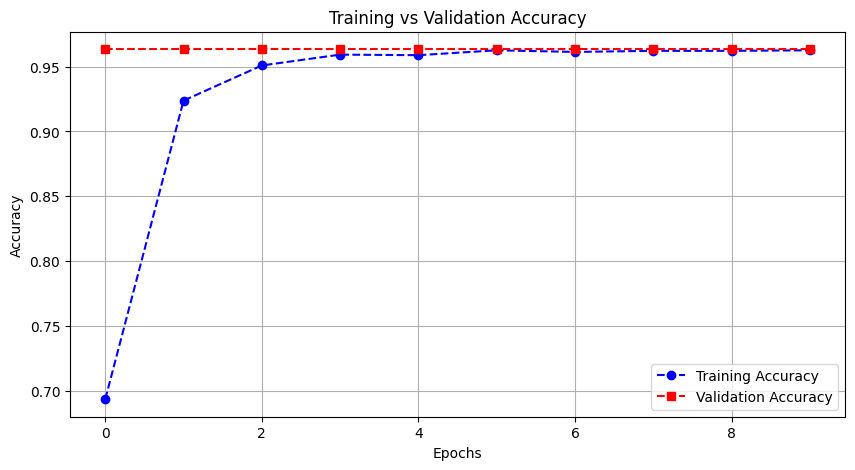

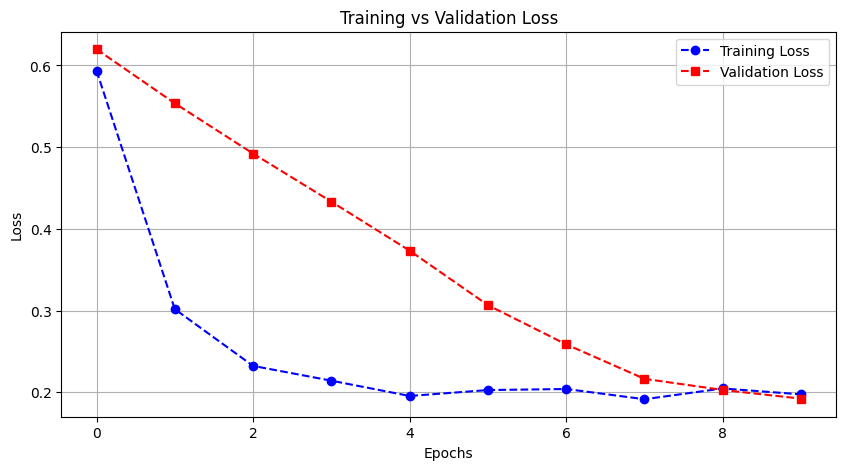

In [ ]:
model1 = Sequential([
    Bidirectional(GRU(128, return_sequences=True, dropout=0.3, recurrent_dropout=0.3), input_shape=(1, X.shape[2])),
    Bidirectional(GRU(64, return_sequences=False, dropout=0.3, recurrent_dropout=0.3)),
    BatchNormalization(),
    Dense(128, activation='relu'),
    Dropout(0.4),
    Dense(64, activation='relu'),
    Dropout(0.4),
    Dense(64, activation='relu'),
    Dropout(0.4),
    Dense(len(np.unique(y)), activation='softmax')
])
model1.summary()


optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001)
model1.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])


history = model1.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=32)

import matplotlib.pyplot as plt


plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue', linestyle='dashed', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='red', linestyle='dashed', marker='s')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()
plt.grid()
plt.show()


plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss', color='blue', linestyle='dashed', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', color='red', linestyle='dashed', marker='s')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss')
plt.legend()
plt.grid()
plt.show()